In [20]:
import os
import pandas as pd
from nixtla import NixtlaClient
import yfinance as yf

client = NixtlaClient(
    api_key=os.getenv("NIXTLA_API_KEY"),
)

In [21]:
# get gold data from yfinance daily with columns date and close
data = yf.download(
    'GC=F', start='2000-01-01', end='2023-01-05', interval='1d', multi_level_index=False
)
data.reset_index(inplace=True)

data = data[["Date", "Close"]]




[*********************100%***********************]  1 of 1 completed


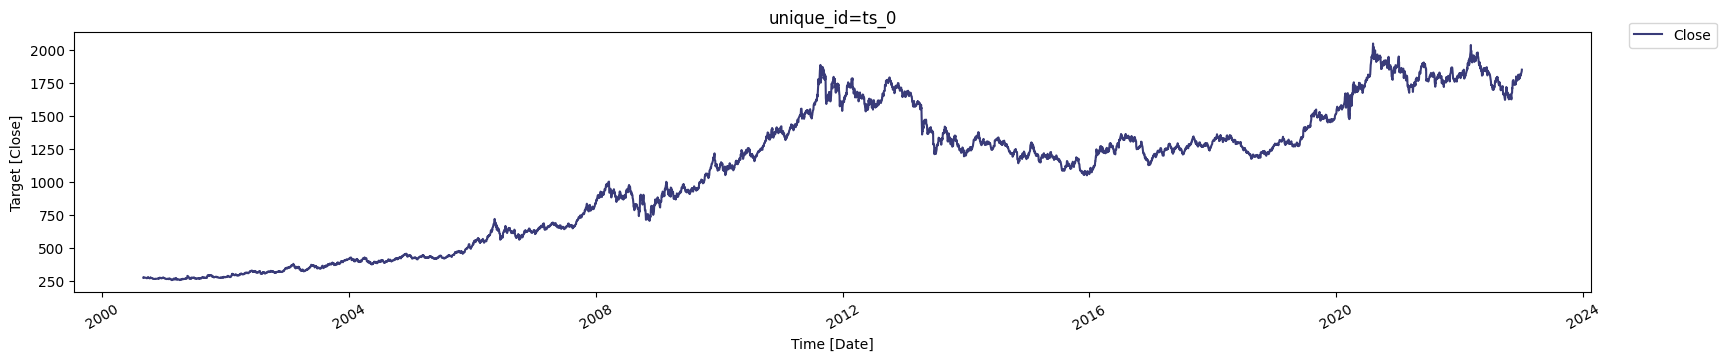

In [22]:
client.plot(data, time_col="Date", target_col="Close")

In [23]:
# drop na rows
data = data.dropna()

# set date as datetime
data["Date"] = pd.to_datetime(data["Date"])

data = data.set_index('Date').resample('D').ffill().reset_index()



In [30]:
fcst = client.forecast(df=data, h=5, freq="D", time_col="Date", target_col="Close")

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [31]:
fcst.head()

,Date,TimeGPT
0,2023-01-05,1830.3092
1,2023-01-06,1827.8148
2,2023-01-07,1826.0234
3,2023-01-08,1824.7216
4,2023-01-09,1825.8184


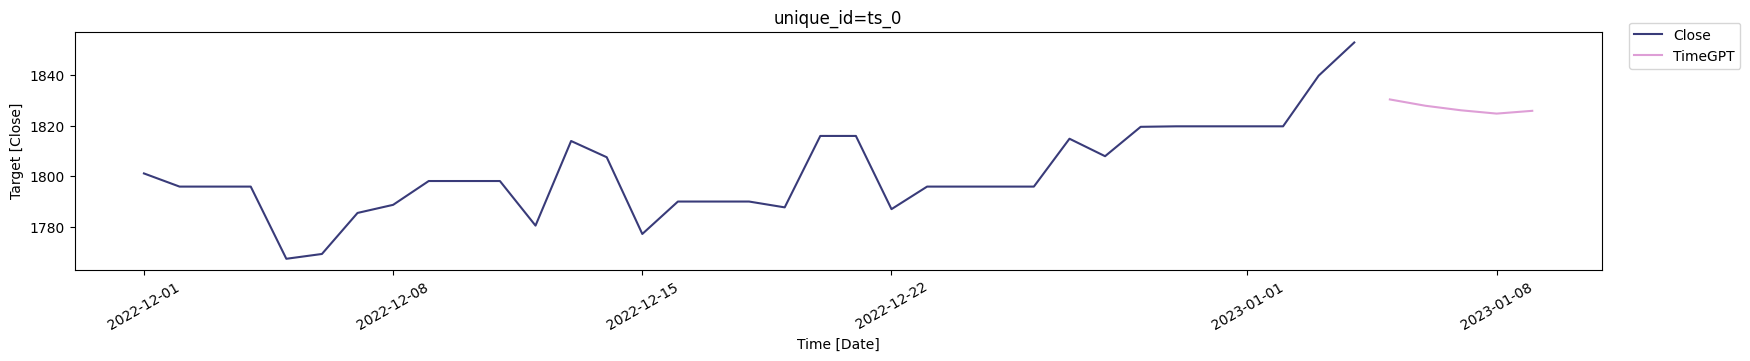

In [35]:
client.plot(data[data['Date'] > '2022-11-30'], fcst, time_col="Date", target_col="Close")